In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [1]:
def create_ideal_dataset(size=1000):
    for i in range(size):
        true = np.random.randint(2)
        pred = true        
        yield {'y_pred': pred, 'y_true': true}

In [2]:
def create_all_positive_preds_dataset(size=1000):
    for i in range(size):
        true = np.random.randint(2)
        pred = 1        
        yield {'y_pred': pred, 'y_true': true}

In [3]:
def create_one_positive_preds_dataset(size=1000):
    yield {'y_pred': 1, 'y_true': 1}
    for i in range(size):
        true = np.random.randint(2)
        pred = 0        
        yield {'y_pred': pred, 'y_true': true}

In [4]:
def create_unbalanced_dataset(size=1000):
    yield {'y_pred': 0, 'y_true': 1}
    for i in range(size):
        true = 0
        pred = 0        
        yield {'y_pred': pred, 'y_true': true}

In [5]:
def create_all_negative_preds_dataset(size=1000):
    for i in range(size):
        true = np.random.randint(2)
        pred = 0        
        yield {'y_pred': pred, 'y_true': true}

In [6]:
def create_one_negative_preds_dataset(size=1000):
    yield {'y_pred': 0, 'y_true': 0}
    for i in range(size):
        true = np.random.randint(2)
        pred = 1       
        yield {'y_pred': pred, 'y_true': true}

In [9]:
def TP(df):
    tmp = df[(df['y_pred'] == 1) & (df['y_true'] == 1)]
    return len(tmp) / len(df)

def TN(df):
    tmp = df[(df['y_pred'] == 0) & (df['y_true'] == 0)]
    return len(tmp) / len(df)

def FP(df):
    tmp = df[(df['y_pred'] == 1) & (df['y_true'] == 0)]
    return len(tmp) / len(df)

def FN(df):
    tmp = df[(df['y_pred'] == 0) & (df['y_true'] == 1)]
    return len(tmp) / len(df)

In [11]:
def recall(df):
    _TP = TP(df)
    _FN = FN(df)
    if _TP == 0:
        return 0
    return _TP / (_TP + _FN)

def precision(df):
    _TP = TP(df)
    _FP = FP(df)
    if _TP == 0:
        return 0
    return _TP / (_TP + _FP)


In [12]:
ideal_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_ideal_dataset():
    ideal_dataset = ideal_dataset.append(i, ignore_index=True)
ideal_dataset.head()

,y_pred,y_true
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [13]:
positive_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_all_positive_preds_dataset():
    positive_dataset = positive_dataset.append(i, ignore_index=True)
positive_dataset.head()

,y_pred,y_true
0,1,1
1,1,0
2,1,1
3,1,0
4,1,0


In [14]:
one_positive_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_one_positive_preds_dataset():
    one_positive_dataset = one_positive_dataset.append(i, ignore_index=True)
one_positive_dataset.head()

,y_pred,y_true
0,1,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
unbalanced_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_unbalanced_dataset():
    unbalanced_dataset = unbalanced_dataset.append(i, ignore_index=True)
unbalanced_dataset.head()

,y_pred,y_true
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [16]:
negative_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_all_negative_preds_dataset():
    negative_dataset = negative_dataset.append(i, ignore_index=True)
negative_dataset.head()

,y_pred,y_true
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1


In [17]:
one_negative_dataset = pd.DataFrame(columns=['y_pred', 'y_true'])
for i in create_one_negative_preds_dataset():
    one_negative_dataset = one_negative_dataset.append(i, ignore_index=True)
one_negative_dataset.head()

,y_pred,y_true
0,0,0
1,1,1
2,1,1
3,1,1
4,1,0


In [21]:
def our_own_formula(precision, recall):
    return precision * recall
for df in [ideal_dataset, positive_dataset, one_positive_dataset, unbalanced_dataset, negative_dataset, one_negative_dataset]:    
    _precision = precision(df)
    _recall = recall(df)
    print(our_own_formula(_precision, _recall))

1.0
0.482
0.002
0
0
0.485


In [24]:
def mean_garmonic(a, b):
    return 2 / ((1 / a) + (1 / b))

In [25]:
mean_garmonic(2, 5)

2.857142857142857

<ipython-input-24-8ac708fa1300>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 2 / ((1 / a) + (1 / b))


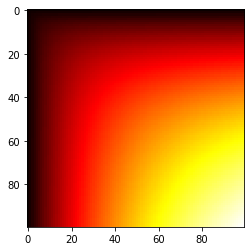

In [26]:
a = []
for i in np.arange(0, 1, 0.01):
    a.append([])
    for j in np.arange(0, 1, 0.01):
        # print(i, j, a)
        a[-1].append(mean_garmonic(i, j))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()